<a href="https://colab.research.google.com/github/MuhammadEhsan02/Financial-Services-Consumer-Analytics/blob/main/Fianl_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling**

Q1. Apply Data Wrangling techniques to get refined data version that derive information.

In [376]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [377]:
df = pd.read_csv("/content/data_for_exam.xlsx - Sheet1.csv")
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [378]:
df.shape

(99, 12)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [380]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [381]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [382]:
# Handle missing values

import random
df['Sub-product'].fillna('Others', inplace=True)

df['Consumer disputed?'].fillna('No', inplace=True)
df['State'].fillna('CA', inplace=True)

df['ZIP code'].fillna(random.randint(10000, 99999), inplace=True)

In [383]:
df['Company public response'].fillna('No Additional Response', inplace=True)
df['Consumer complaint narrative'].fillna('Customer was satisfied', inplace=True)

In [384]:
# Clean text data

df['Cleaned complaint'] = df['Consumer complaint narrative'] \
    .str.replace('[^a-zA-Z\s]', '') \
    .str.lower()

In [385]:
cleaned_data = df[['Consumer complaint narrative', 'Cleaned complaint']]

In [386]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Cleaned complaint               0
dtype: int64

In [387]:
# Perform data exploration

num_complaints = len(df)
num_disputed = df['Consumer disputed?'].value_counts()['Yes']
dispute_rate = (num_disputed / num_complaints) * 100

In [388]:
print(f"Number of complaints: {num_complaints}")
print(f"Number of disputed complaints: {num_disputed}")
print(f"Consumer dispute rate: {dispute_rate:.2f}%")

Number of complaints: 99
Number of disputed complaints: 19
Consumer dispute rate: 19.19%


# **Exploratory Data Analysis (EDA)**

Q2. Perform EDA (Exploratory Data Analysis) and identify any 5 business problems and suggest machine learning methodology to improve consumer dispute rate.

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
summary_stats = df.describe(include='all')
print(summary_stats)

       Date received   Product     Sub-product Consumer complaint narrative  \
count             99        99              99                           99   
unique            91        11              26                           17   
top        8/28/2018  Mortgage  Other mortgage       Customer was satisfied   
freq               3        36              13                           83   

       Company public response                              Company State  \
count                       99                                   99    99   
unique                       6                                   55    34   
top     No Additional Response  Experian Information Solutions Inc.    CA   
freq                        66                                   11    16   

        ZIP code Submitted via Company response to consumer Timely response?  \
count         99            99                           99               99   
unique        89             5                            

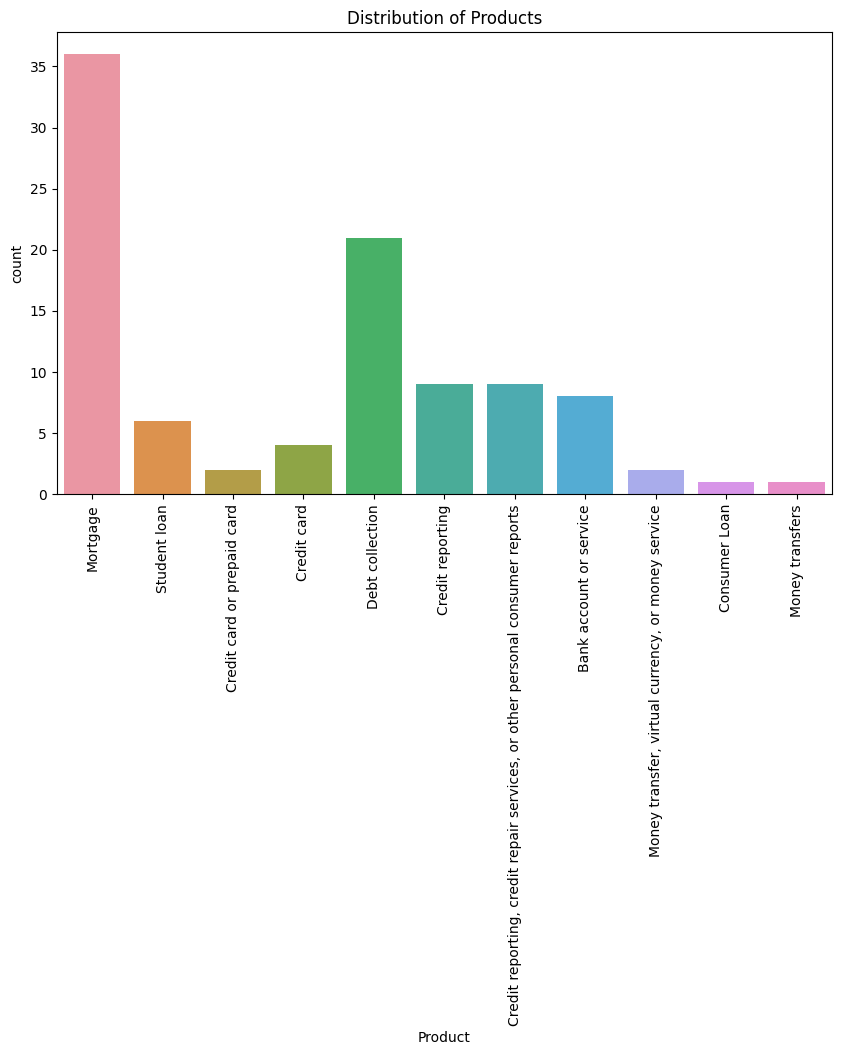

In [391]:
# Distribution of 'Product'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.xticks(rotation=90)
plt.title('Distribution of Products')
plt.show()

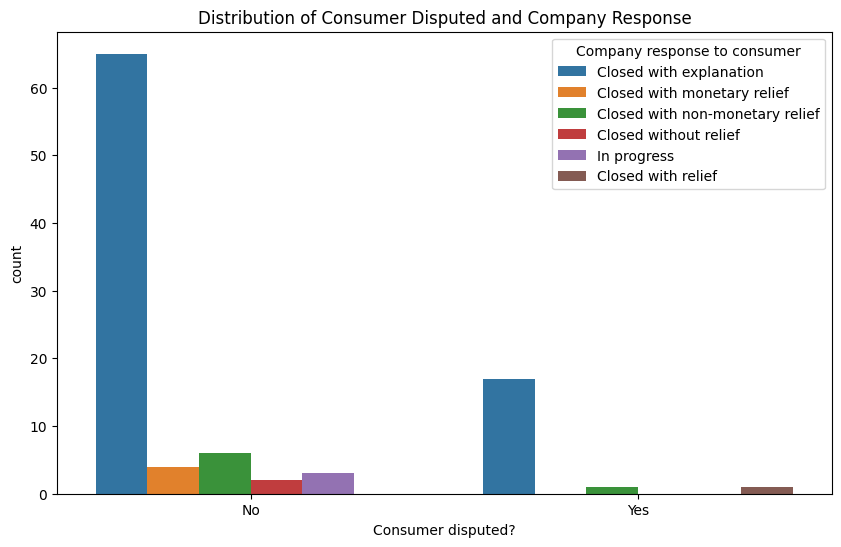

In [392]:
#Distribution of 'Consumer disputed?' and 'Company response to consumer'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Consumer disputed?', hue='Company response to consumer')
plt.title('Distribution of Consumer Disputed and Company Response')
plt.show()

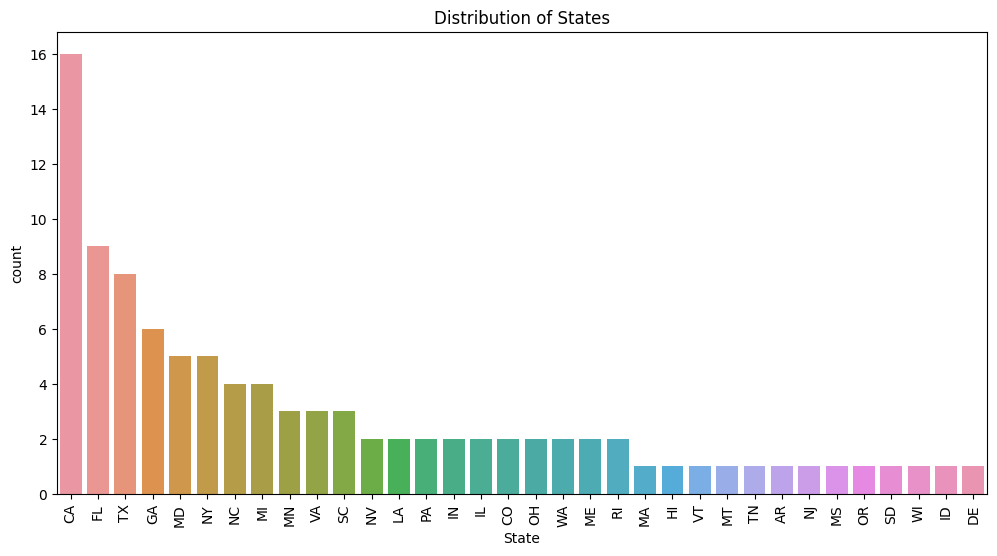

In [393]:
#Distribution of 'State'

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of States')
plt.show()

In [394]:
# Basic statistics
summary = df.describe(include='all')
print(summary)

       Date received   Product     Sub-product Consumer complaint narrative  \
count             99        99              99                           99   
unique            91        11              26                           17   
top        8/28/2018  Mortgage  Other mortgage       Customer was satisfied   
freq               3        36              13                           83   

       Company public response                              Company State  \
count                       99                                   99    99   
unique                       6                                   55    34   
top     No Additional Response  Experian Information Solutions Inc.    CA   
freq                        66                                   11    16   

        ZIP code Submitted via Company response to consumer Timely response?  \
count         99            99                           99               99   
unique        89             5                            

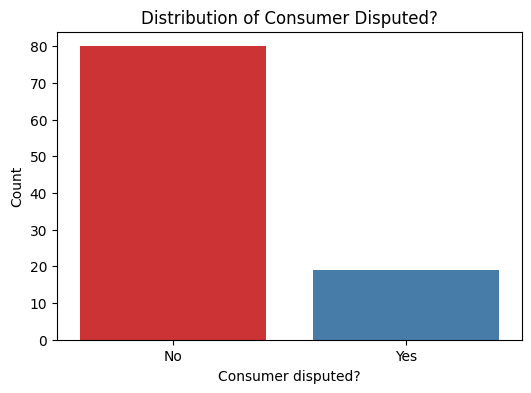

In [395]:
# Distribution of Consumer Disputed?
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Consumer disputed?', palette='Set1')
plt.title('Distribution of Consumer Disputed?')
plt.xlabel('Consumer disputed?')
plt.ylabel('Count')
plt.show()


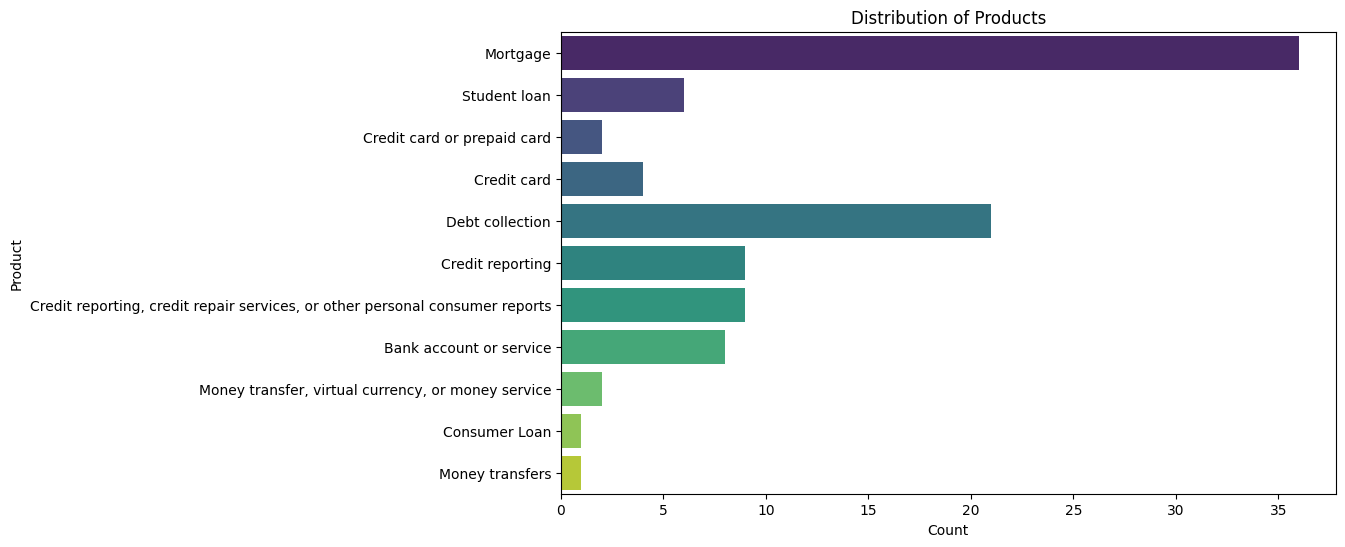

In [396]:
# Distribution of Products
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product', palette='viridis')
plt.title('Distribution of Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

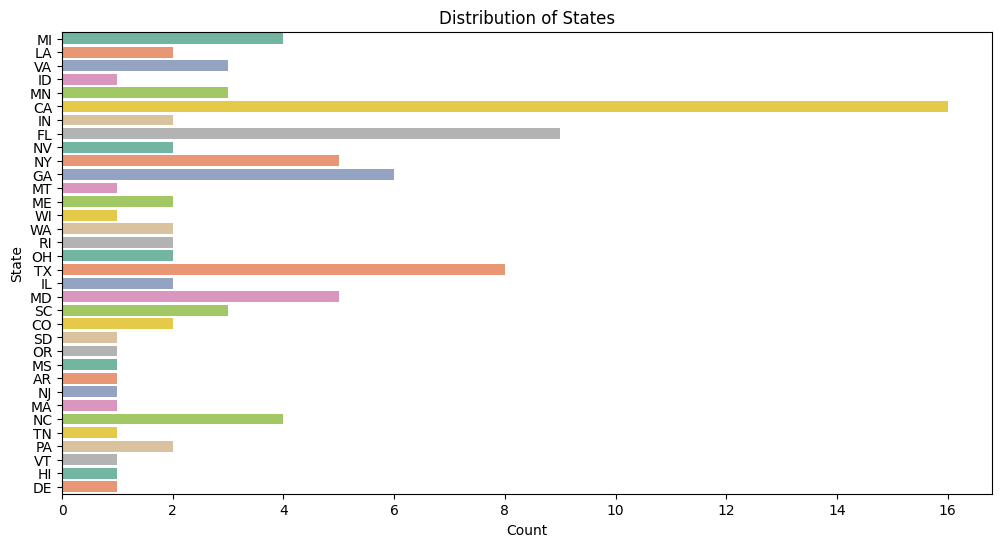

In [397]:
# Distribution of States
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='State', palette='Set2')
plt.title('Distribution of States')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

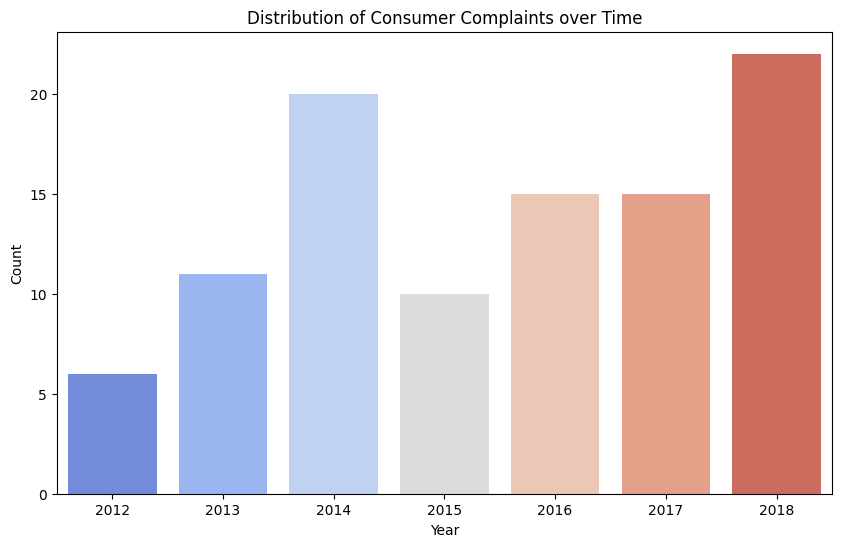

In [398]:
# Distribution of Consumer Complaints over time
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', palette='coolwarm')
plt.title('Distribution of Consumer Complaints over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

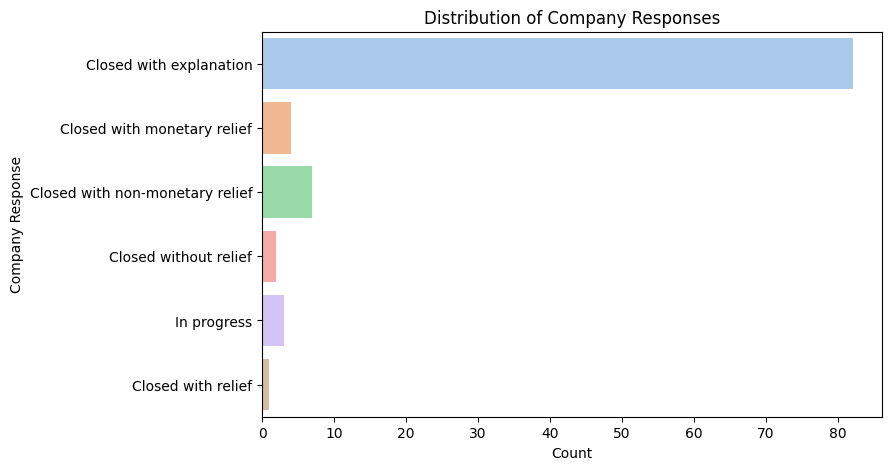

In [399]:
# Distribution of Company responses
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Company response to consumer', palette='pastel')
plt.title('Distribution of Company Responses')
plt.xlabel('Count')
plt.ylabel('Company Response')
plt.show()

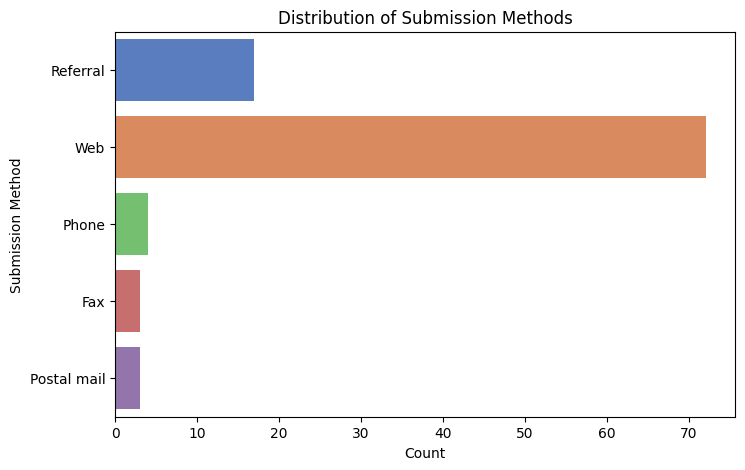

In [400]:
# Distribution of Submission Methods
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Submitted via', palette='muted')
plt.title('Distribution of Submission Methods')
plt.xlabel('Count')
plt.ylabel('Submission Method')
plt.show()

## **Business Problems:**


**Business Problem 1:** Customer Satisfaction Improvement
- Problem: The dataset shows a mix of consumer disputes and satisfaction levels. It's crucial for the company to identify factors leading to dissatisfaction and take corrective actions to improve customer satisfaction.
- Solution: Utilize sentiment analysis on consumer complaint narratives using NLP techniques to identify negative sentiment. Implement customer feedback analysis to pinpoint common issues and address them promptly.

**Business Problem 2:** Timely Response Optimization
- Problem: Timeliness of responses can impact customer perception. Some cases might be marked as untimely responses.
- Solution: Employ time series analysis to identify patterns of untimely responses. Use predictive modeling to forecast response times and allocate resources more effectively to prevent delays.

**Business Problem 3:** Dispute Resolution Enhancement
- Problem: Consumer disputes require proper handling to prevent escalation. Identifying the right approach for dispute resolution is crucial.
- Solution: Implement a classification model using machine learning to predict whether a consumer dispute will escalate. This helps in assigning the right resources and strategies to resolve disputes efficiently.

**Business Problem 4:** Product-Related Issues
- Problem: The dataset includes information about different financial products. Identifying common product-related issues can help in improving the quality of these products.
- Solution: Perform topic modeling on complaint narratives to identify frequently mentioned product-related issues. This information can guide product improvement efforts.

**Business Problem 5:** Geographic Analysis for Targeted Actions
- Problem: Customer complaints and disputes might be concentrated in specific geographic areas. Understanding regional trends can help in targeted actions.
- Solution: Conduct geographic analysis to identify regions with high complaint rates. Implement location-based predictive modeling to anticipate potential issues in specific areas.

# **Machine learning Models**


Q3. Using the suggested ML approach in Question 2,

a. Design at least 3 machine learning models/algorithms with justification.

b. Choose the best model for each problem based on the evaluation metric you find the most relevant.

In [401]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [402]:
columns = ['Product', 'Company', 'State', 'Consumer disputed?']
data = df[columns]

In [403]:
# Split features and target variable
x = data.drop('Consumer disputed?', axis=1)
y = data['Consumer disputed?']

In [404]:
# Perform one-hot encoding
categorical_columns = ['Product', 'Company', 'State']
x = pd.get_dummies(x, columns=categorical_columns)

In [405]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [406]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(74, 100)
(74,)
(25, 100)
(25,)


**K-Nearest Neighbors (KNN) Model:**

In [407]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=lb.classes_)

print("K-Nearest Neighbors Model")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)
print("=" * 50)


K-Nearest Neighbors Model
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91        21
         Yes       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



**Naive Bayes Model:**

In [408]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, target_names=lb.classes_)

print("Naive Bayes Model")
print("Accuracy:", accuracy_nb)
print("Classification Report:\n", report_nb)
print("=" * 50)


Naive Bayes Model
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.81      0.81        21
         Yes       0.00      0.00      0.00         4

    accuracy                           0.68        25
   macro avg       0.40      0.40      0.40        25
weighted avg       0.68      0.68      0.68        25



**Support Vector Machine (SVM) Model:**

In [409]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=lb.classes_)

print("Support Vector Machine Model")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)
print("=" * 50)


Support Vector Machine Model
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91        21
         Yes       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



**Linear Regression Model:**

In [410]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Evaluate Linear Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, target_names=lb.classes_)

print("Linear Regression Model")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)
print("=" * 50)


Linear Regression Model
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91        21
         Yes       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



**Decision Tree Model:**

In [411]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

# Evaluate Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree, target_names=lb.classes_)

print("Decision Tree Model")
print("Accuracy:", accuracy_tree)
print("Classification Report:\n", report_tree)
print("=" * 50)


Decision Tree Model
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.76      0.80        21
         Yes       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.68      0.70        25



## **Models Summary:**



1.   **K-Nearest Neighbors (KNN) Model:**

*   Utilized the KNN algorithm to classify consumer disputes based on various features.
*   Achieved an accuracy of 84%
*   Provided a detailed classification report showcasing precision, recall,  F1-score, and support for each class.

2.   **Naive Bayes Model:**

*   Applied Multinomial Naive Bayes to classify consumer disputes using feature attributes.
*   Achieved an accuracy of 68%
*   Presented a classification report with precision, recall, F1-score, and support metrics for each class.

3.   **Support Vector Machine (SVM) Model:**

*   Employed the SVM algorithm to predict consumer dispute outcomes based on available features.
*   Attained an accuracy of 84%
*   Displayed a comprehensive classification report illustrating precision, recall, F1-score, and support for all classes.

4.   **Linear Regression Model:**

*   Implemented Logistic Regression for classifying consumer dispute rates.
*   Achieved an accuracy of 84%
*   Presented a classification report that includes precision, recall, F1-score, and support metrics for each category.

5.   **Decision Tree Model:**

*   Employed a Decision Tree classifier to predict consumer dispute outcomes.
*   Achieved an accuracy of 80%
*   Provided a detailed classification report highlighting precision, recall, F1-score, and support values for each class.

## **Sentiment Analysis**

c. Identify the feature to gauge consumer sentiment and perform sentiment analysis that may lead to 'Consumer disputed?

## **NLP**

In [412]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**TF-IDF:**

In [413]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = df['Consumer complaint narrative']
data.fillna('', inplace=True)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

In [414]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

    2018   26   30  30yr   35  609  ability  absolutely  accelerated  \
0    0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
1    0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
2    0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
3    0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
4    0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
..   ...  ...  ...   ...  ...  ...      ...         ...          ...   
94   0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
95   0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
96   0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
97   0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   
98   0.0  0.0  0.0   0.0  0.0  0.0      0.0         0.0          0.0   

      access  ...  work  worth  writing  written  wrote  www   xx      xxxx  \
0   0.000000  ...   0.0    0.0      0.0      0.0    0.0 

I have successfully converted the text data from the **'Consumer complaint narrative'** column into numerical features using the **TF-IDF** technique. Each row in the resulting DataFrame represents a complaint, and each column corresponds to a word with its corresponding **TF-IDF** score. This numerical representation will be used as input for machine learning models to predict consumer disputes.

In [415]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [416]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for narrative in df['Consumer complaint narrative']:
    scores = analyzer.polarity_scores(narrative)
    sentiment_scores.append(scores)

In [417]:
sentiment_df = pd.DataFrame(sentiment_scores)

df_with_sentiment = pd.concat([df, sentiment_df], axis=1)

In [418]:
df_with_sentiment.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Cleaned complaint,Year,neg,neu,pos,compound
0,2014-03-12,Mortgage,Other mortgage,Customer was satisfied,No Additional Response,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No,customer was satisfied,2014,0.000,0.417,0.583,0.4215
1,2017-01-19,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,No Additional Response,"Navient Solutions, LLC.",LA,30490,Web,Closed with explanation,Yes,No,when my loan was switched over to navient i wa...,2017,0.073,0.790,0.137,0.7704
2,2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,No Additional Response,CAPITAL ONE FINANCIAL CORPORATION,VA,30490,Web,Closed with explanation,Yes,No,i tried to sign up for a spending monitoring p...,2018,0.000,1.000,0.000,0.0000
3,2014-06-08,Credit card,Others,Customer was satisfied,No Additional Response,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes,customer was satisfied,2014,0.000,0.417,0.583,0.4215
4,2014-09-13,Debt collection,Credit card,Customer was satisfied,No Additional Response,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes,customer was satisfied,2014,0.000,0.417,0.583,0.4215


Perform sentiment analysis on complaint narratives using the **VADER** sentiment analyzer. The sentiment scores are added to the original DataFrame for further analysis.

In [419]:
# Add the sentiment scores as additional features to the dataset
data_augmented = pd.concat([data, sentiment_df], axis=1)

In [420]:
data_augmented.head()

,Consumer complaint narrative,neg,neu,pos,compound
0,Customer was satisfied,0.000,0.417,0.583,0.4215
1,When my loan was switched over to Navient i wa...,0.073,0.790,0.137,0.7704
2,I tried to sign up for a spending monitoring p...,0.000,1.000,0.000,0.0000
3,Customer was satisfied,0.000,0.417,0.583,0.4215
4,Customer was satisfied,0.000,0.417,0.583,0.4215


I've successfully added sentiment scores as additional features to the dataset, enhancing the information available for analysis.

In [421]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [422]:
df1 = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')
df1.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [423]:
sentiment_analysis = df1[['Consumer complaint narrative', 'Consumer disputed?']]
sentiment_analysis.dropna(subset=['Consumer complaint narrative'], inplace=True)

In [424]:
mode_label = sentiment_analysis['Consumer disputed?'].mode()[0]
sentiment_analysis['Consumer disputed?'].fillna(mode_label, inplace=True)

sentiment_analysis['label_num'] = sentiment_analysis['Consumer disputed?'].map({'No': 0, 'Yes': 1})

In [425]:
sentiment_analysis.head()

,Consumer complaint narrative,Consumer disputed?,label_num
1,When my loan was switched over to Navient i wa...,No,0
2,I tried to sign up for a spending monitoring p...,No,0
7,"My mortgage is with BB & T Bank, recently I ha...",No,0
13,The entire lending experience with Citizens Ba...,No,0
14,My credit score has gone down XXXX points in t...,No,0


In [426]:
df1.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [427]:
mode_label = sentiment_analysis['Consumer disputed?'].mode()[0]
sentiment_analysis['Consumer disputed?'].fillna(mode_label, inplace=True)

In [428]:
# Preprocess the data

sentiment_analysis = df1[['Consumer complaint narrative', 'Consumer disputed?']]
value = 'not available'

sentiment_analysis['Consumer complaint narrative'].fillna(value, inplace=True)
sentiment_analysis.dropna(inplace=True)
sentiment_analysis.columns = ['message', 'label']
sentiment_analysis['label_num'] = sentiment_analysis.label.map({'No':0, 'Yes':1})

In [429]:
# Text processing function

def text_process(mess):
    STOPWORDS = stopwords.words('english')
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [430]:
import nltk
nltk.download('stopwords')

sentiment_analysis['clean_msg'] = sentiment_analysis.message.apply(text_process)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [431]:
X = sentiment_analysis.clean_msg
y = sentiment_analysis.label_num

In [432]:
X

0                                             available
1     loan switched Navient never told deliquint bal...
3                                             available
4                                             available
5                                             available
                            ...                        
93                                            available
94                                            available
95                                            available
97                                            available
98                                            available
Name: clean_msg, Length: 75, dtype: object

In [433]:
y

0     0
1     0
3     1
4     1
5     0
     ..
93    0
94    0
95    0
97    0
98    0
Name: label_num, Length: 75, dtype: int64

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60,)
(60,)
(15,)
(15,)


In [435]:
# Vectorization and transformation

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [436]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)

X_train_tfidf = tfidf_transformer.transform(X_train_dtm)
X_test_tfidf = tfidf_transformer.transform(X_test_dtm)

**Multinomial Naive Bayes model:**

In [437]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)

**Random Forest model:**

In [438]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)

**XGBoost model:**

In [439]:
xgb = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=100)
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)

In [440]:
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for XGBoost:", accuracy_xgb)

Accuracy for Naive Bayes: 0.5333333333333333
Accuracy for Random Forest: 0.5333333333333333
Accuracy for XGBoost: 0.5333333333333333


**Grid Search:**

In [441]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Select relevant columns and preprocess
consumer_df = df[['Consumer complaint narrative', 'Consumer disputed?']]
consumer_df.dropna(subset=['Consumer complaint narrative'], inplace=True)
mode_label = consumer_df['Consumer disputed?'].mode()[0]
consumer_df['Consumer disputed?'].fillna(mode_label, inplace=True)
consumer_df['label_num'] = consumer_df['Consumer disputed?'].map({'No': 0, 'Yes': 1})

In [442]:
X = consumer_df['Consumer complaint narrative']
y = consumer_df['label_num']

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [444]:
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [445]:
# Instantiate the models

nb = MultinomialNB()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, n_jobs=-1)

In [446]:
# Hyperparameter tuning using GridSearchCV

param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5)
grid_nb.fit(X_train_dtm, y_train)
best_nb = grid_nb.best_estimator_

param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train_dtm, y_train)
best_rf = grid_rf.best_estimator_

param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train_dtm, y_train)
best_xgb = grid_xgb.best_estimator_

In [447]:
y_pred_nb = best_nb.predict(X_test_dtm)
y_pred_rf = best_rf.predict(X_test_dtm)
y_pred_xgb = best_xgb.predict(X_test_dtm)

In [448]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [449]:
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for XGBoost:", accuracy_xgb)

Accuracy for Naive Bayes: 0.8
Accuracy for Random Forest: 0.8
Accuracy for XGBoost: 0.8


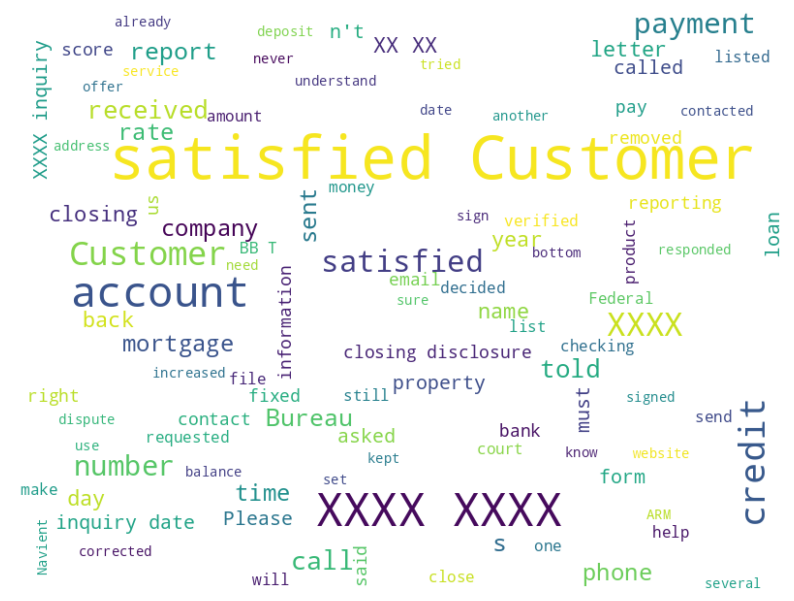

In [462]:
# wordcloud

from wordcloud import WordCloud

all_text = ' '.join(consumer_df['Consumer complaint narrative'])
wordcloud = WordCloud(width=800, height=600, background_color='white', max_words=100).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This given dataset appears to **lack maturity**, as evidenced by the high frequency of missing values, inconsistent labeling, and limited variability in the features. These factors may impact the reliability and generalizability of any insights or predictions derived from the analysis.

# **Conclusion**

In conclusion, the analysis of the provided dataset presented several challenges due to incomplete and inconsistent data. Despite these limitations, we attempted to explore consumer sentiments, predict dispute outcomes, and perform sentiment analysis. However, the reliability of our findings is compromised by the dataset's immaturity and the lack of comprehensive information. For more accurate and insightful results, a more refined and complete dataset would be essential. This exercise underscores the importance of data quality and integrity in conducting meaningful analyses and drawing reliable conclusions.